### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import  train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.plotting import plot_decision_regions

In [11]:
df1=pd.read_csv(r"D:\Multiple CSV\Multiple CSV\9.random.csv",header=None)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       400 non-null    float64
 1   1       400 non-null    float64
 2   2       400 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


In [12]:
df1[2]=df1[2].astype("int32")
df1[2].unique()


array([0, 1])

In [13]:
fv=df1.iloc[:,:2]
cv=df1.iloc[: ,-1]

In [14]:
cv

0      0
1      1
2      0
3      1
4      1
      ..
395    1
396    0
397    1
398    1
399    1
Name: 2, Length: 400, dtype: int32

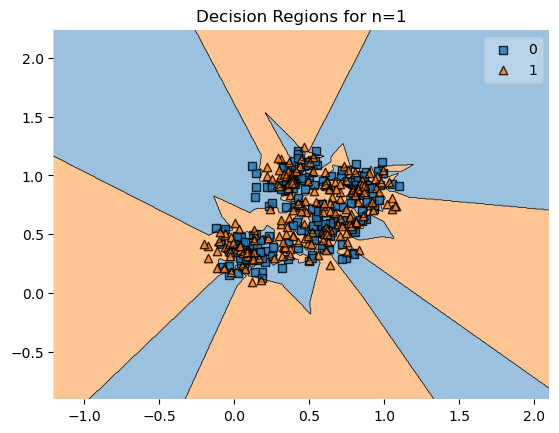

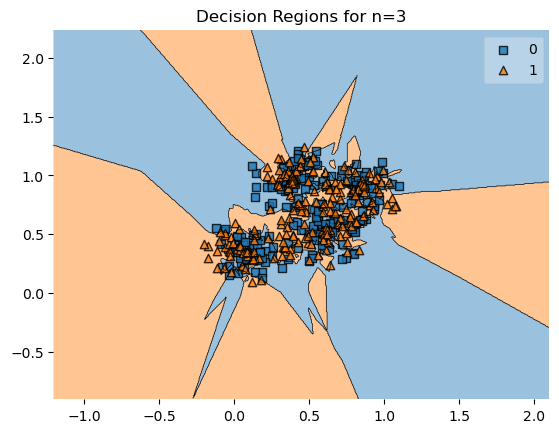

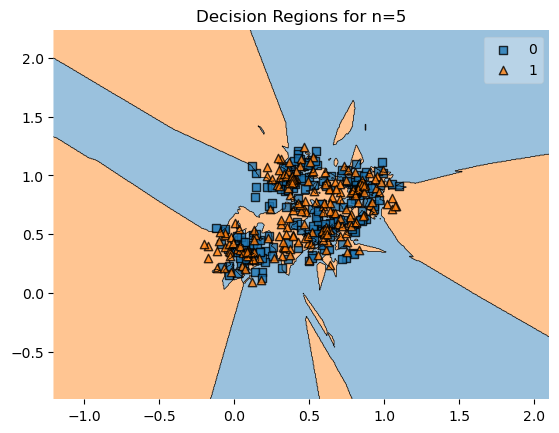

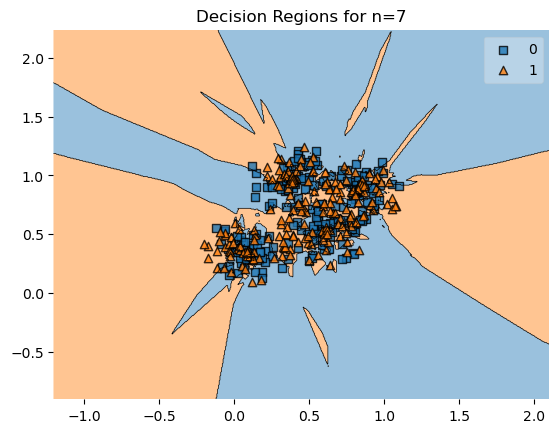

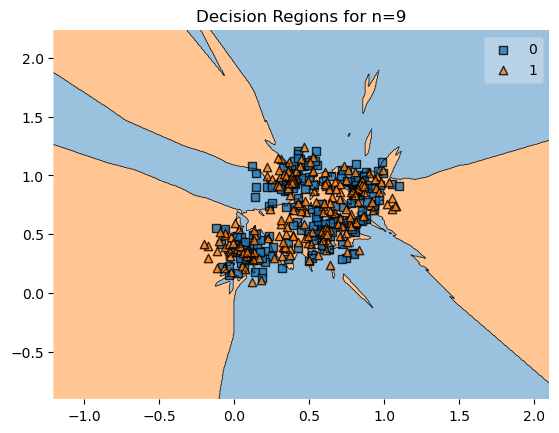

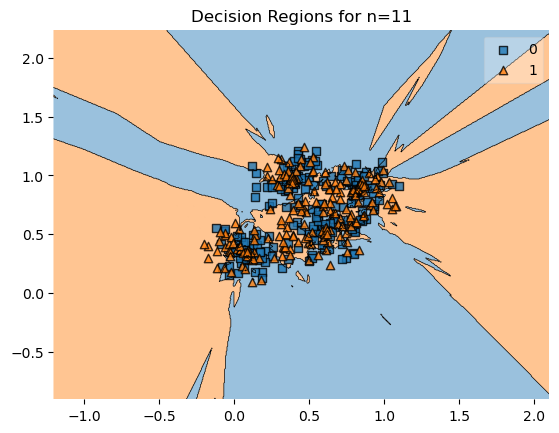

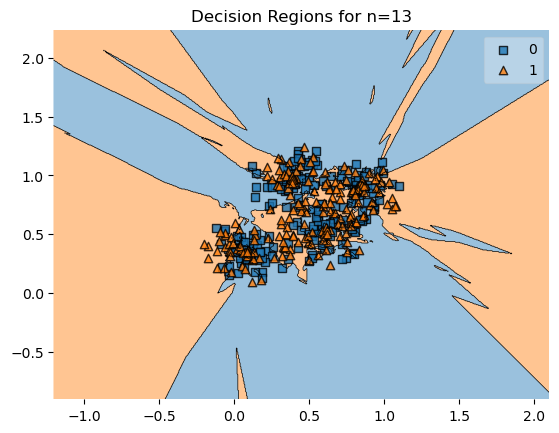

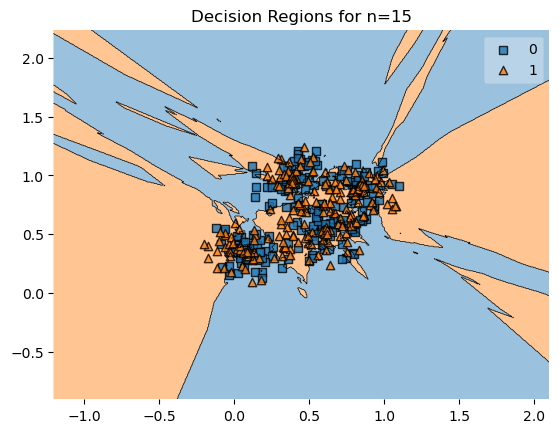

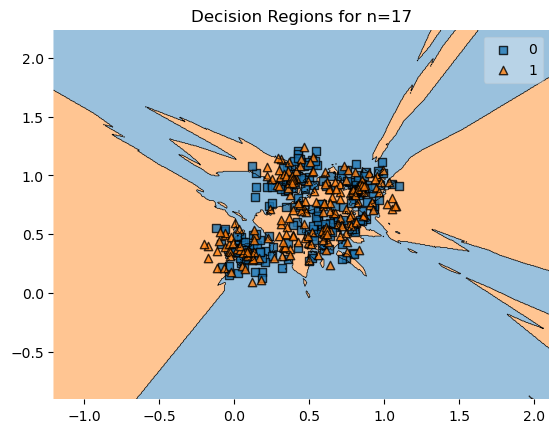

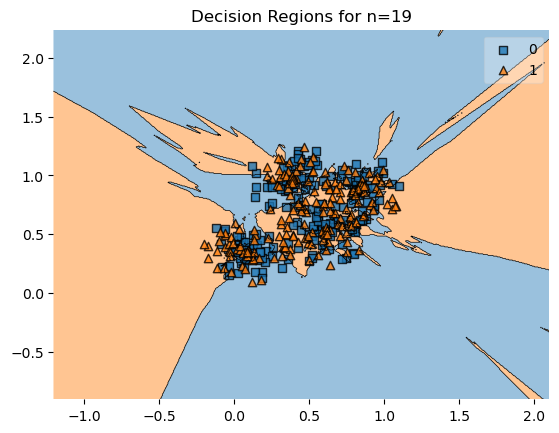

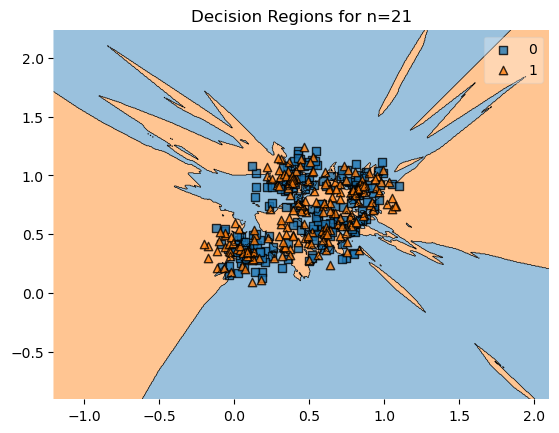

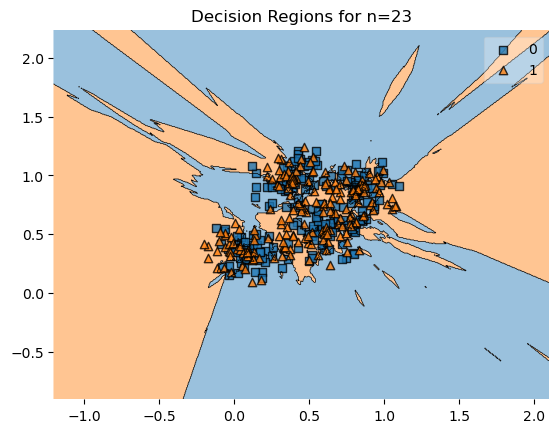

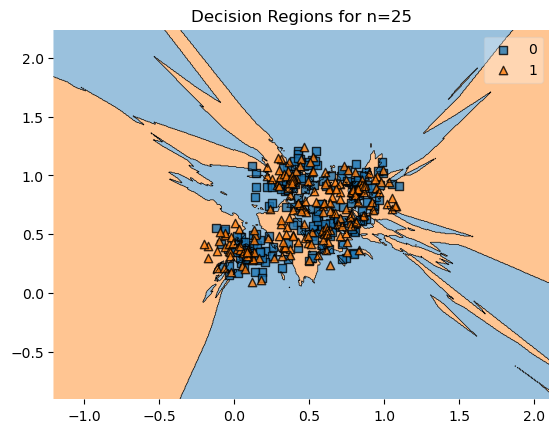

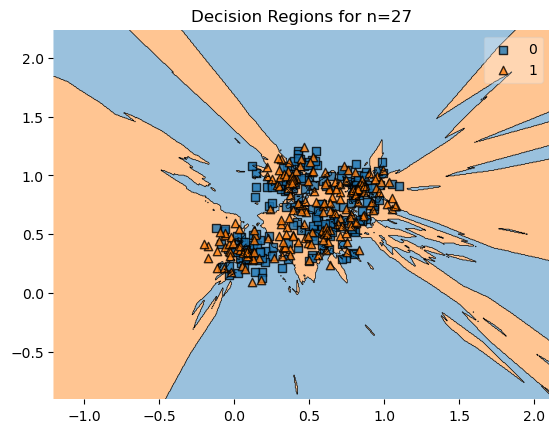

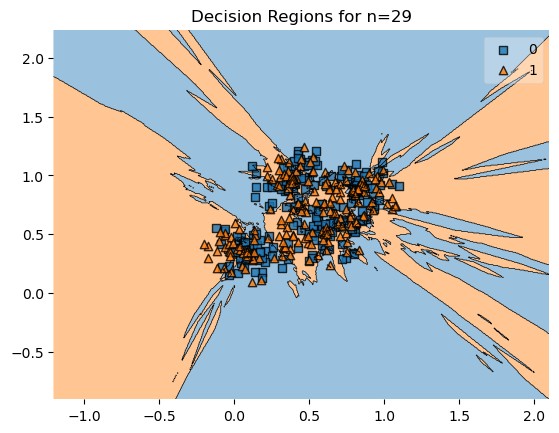

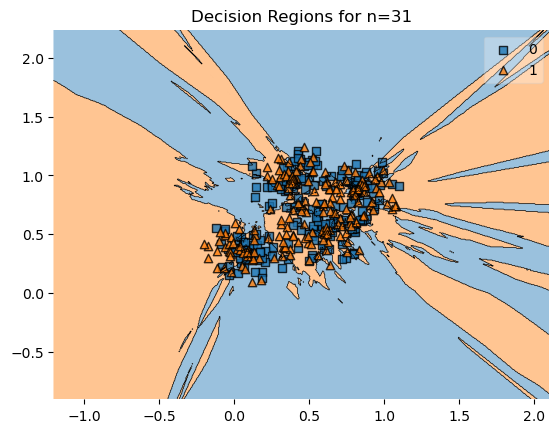

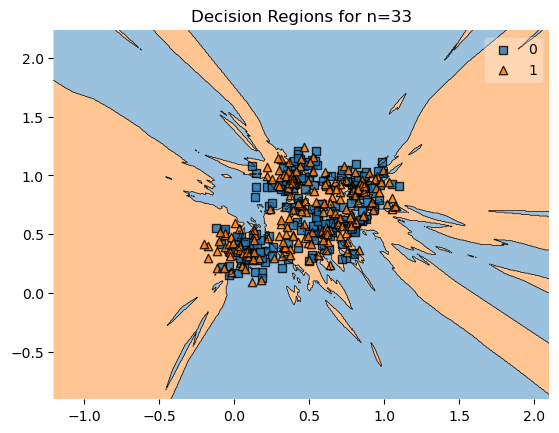

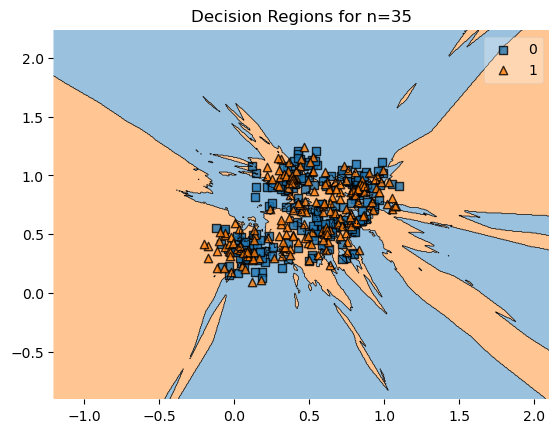

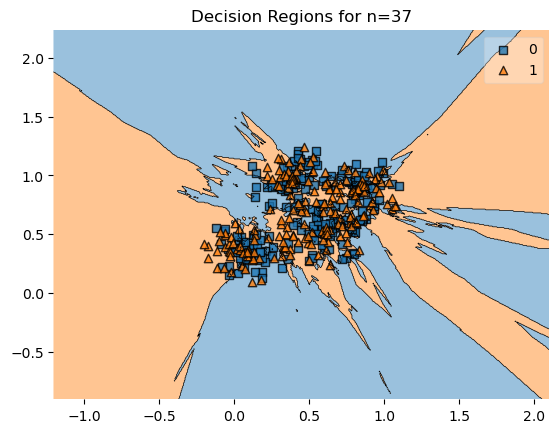

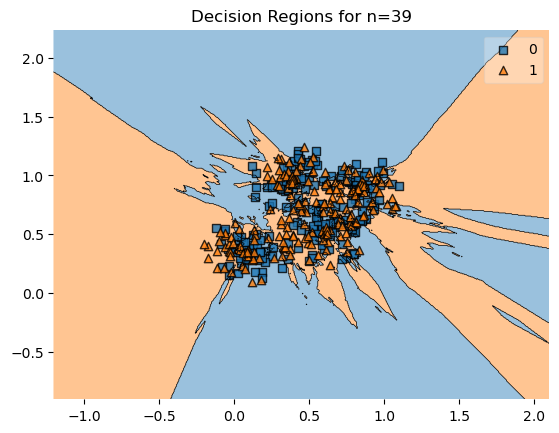

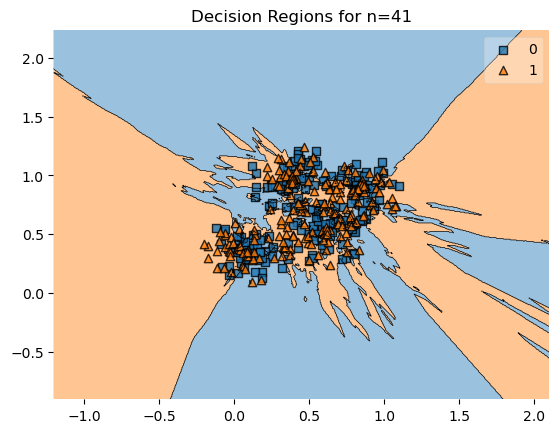

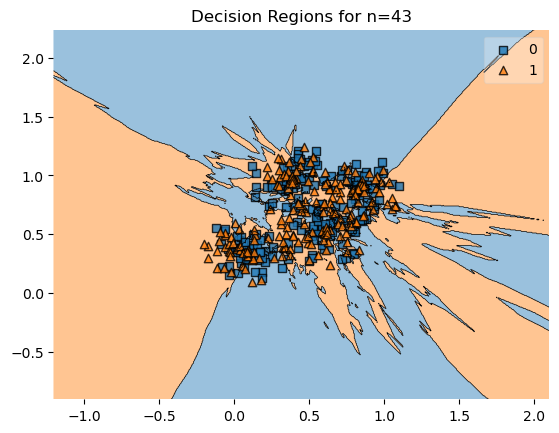

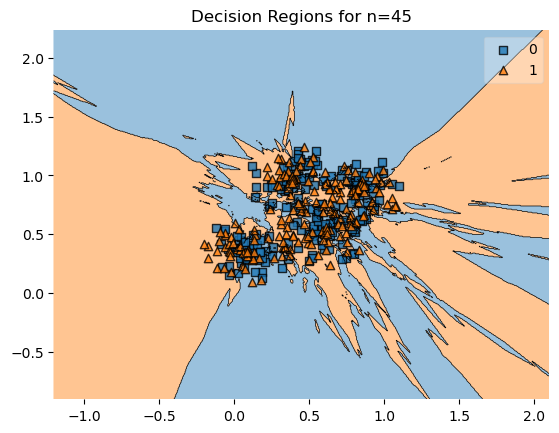

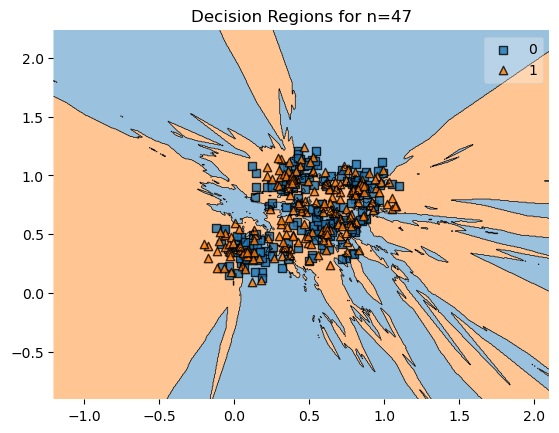

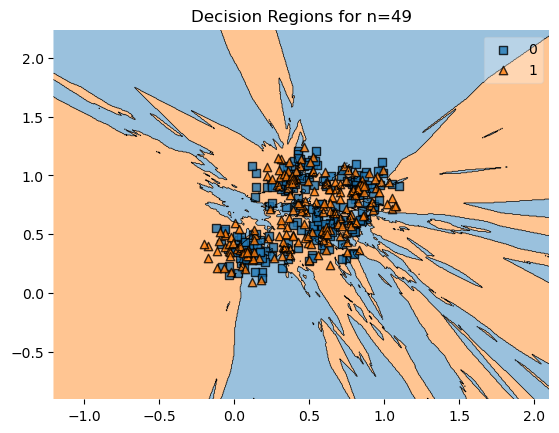

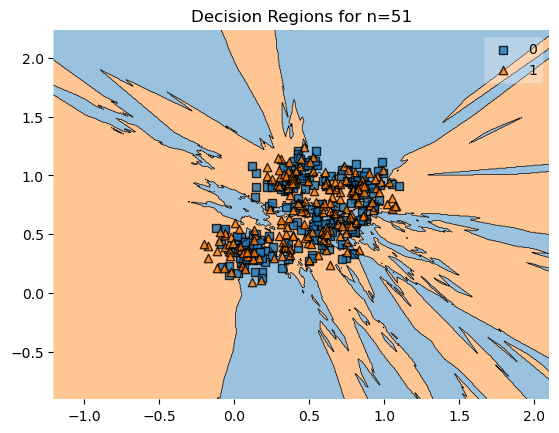

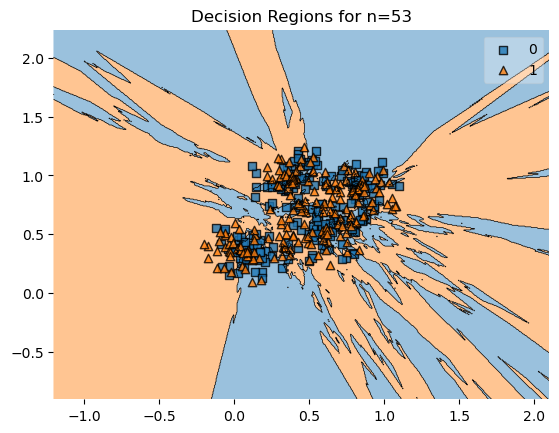

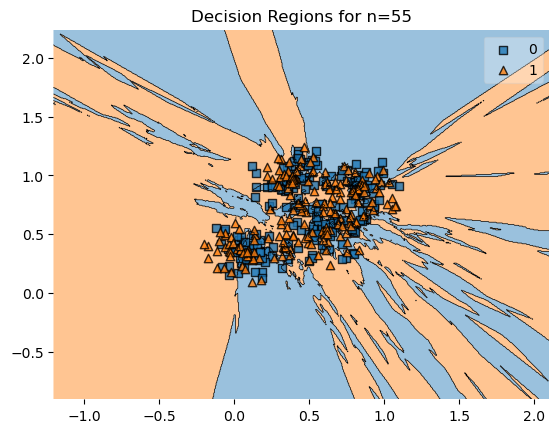

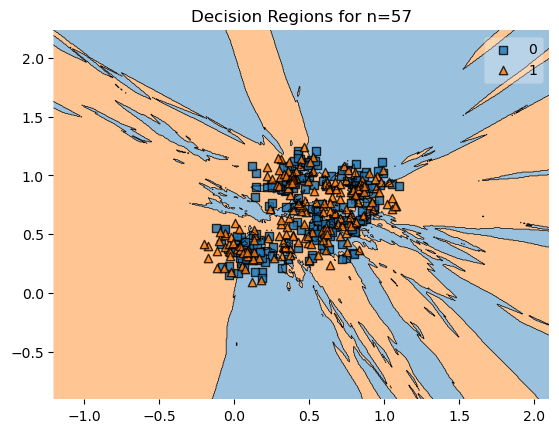

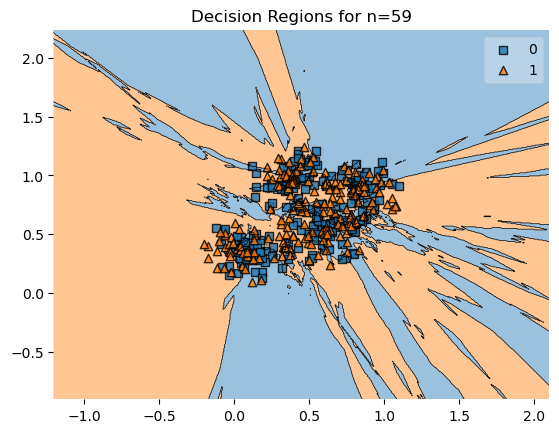

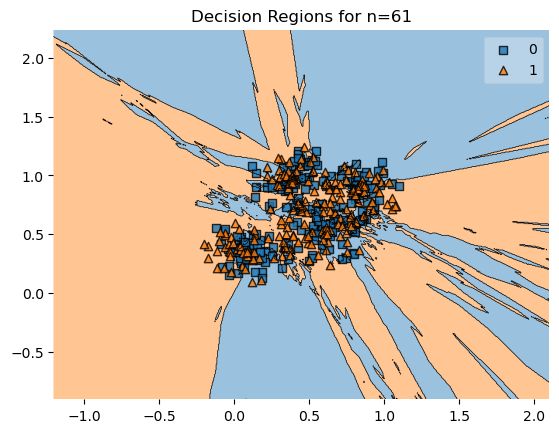

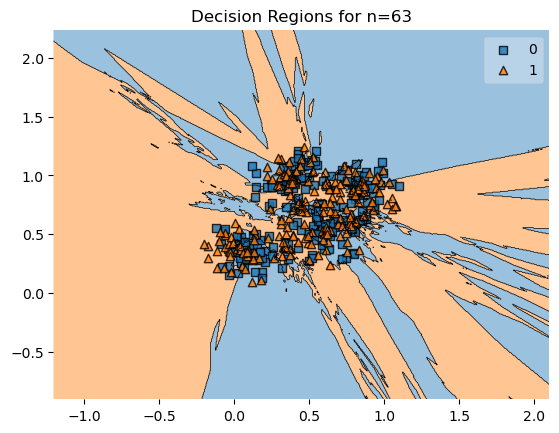

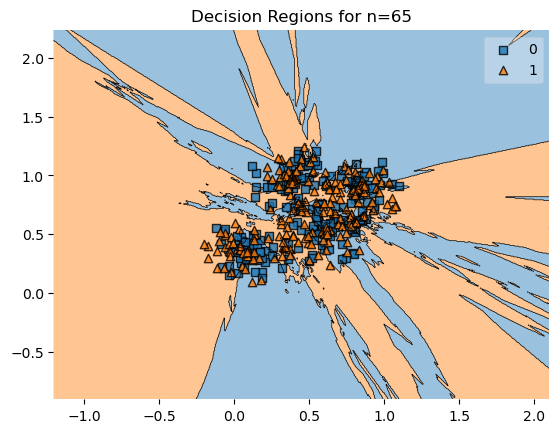

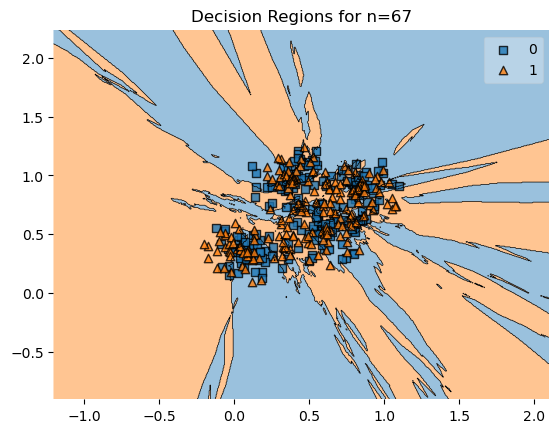

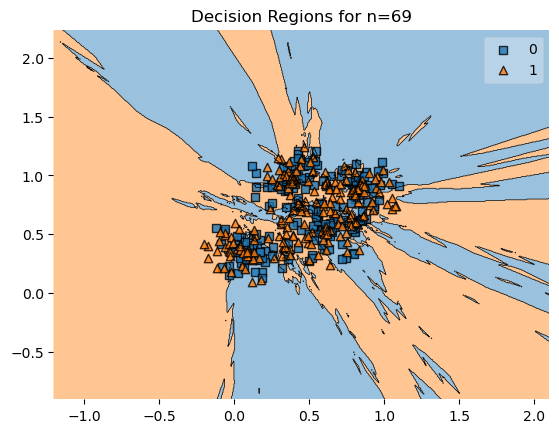

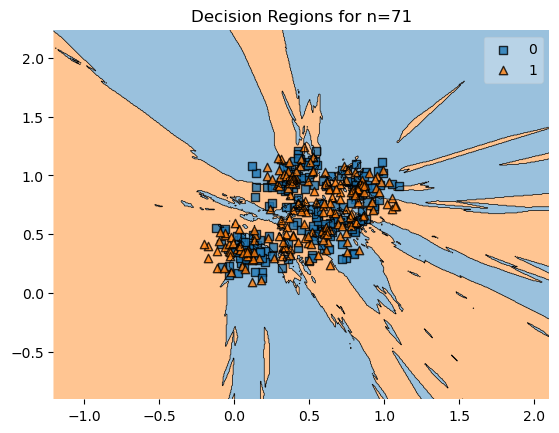

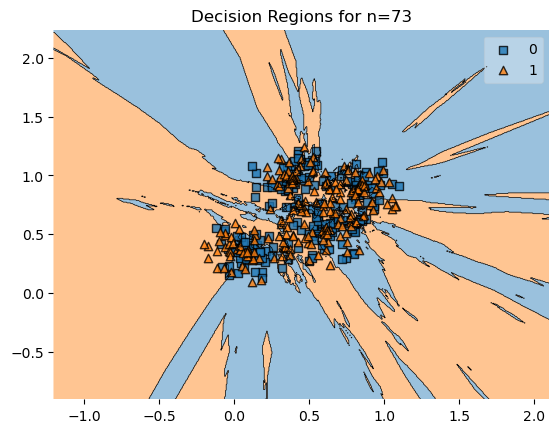

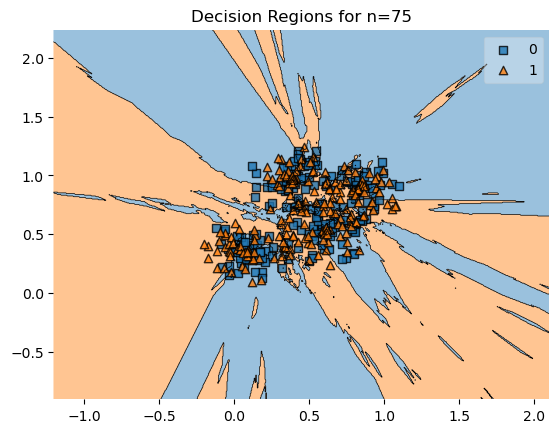

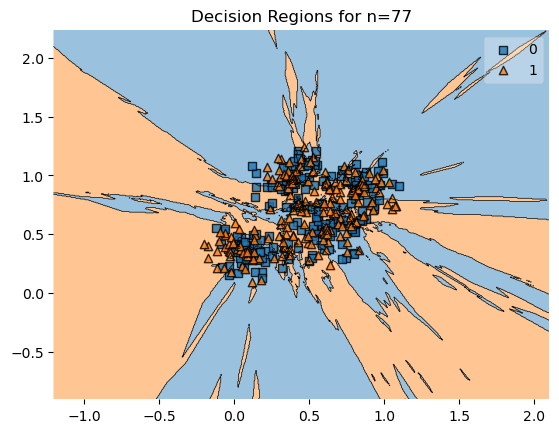

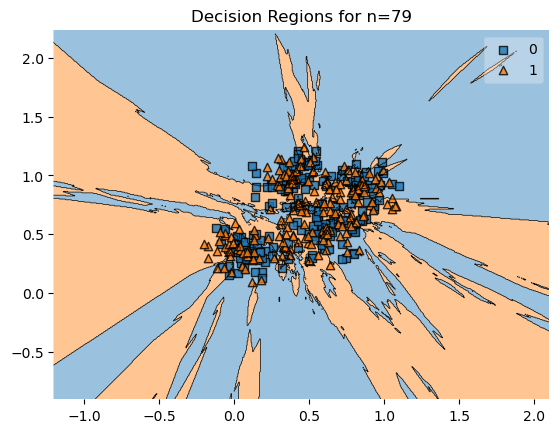

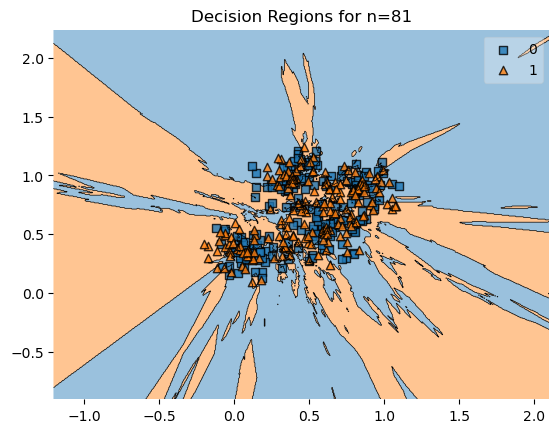

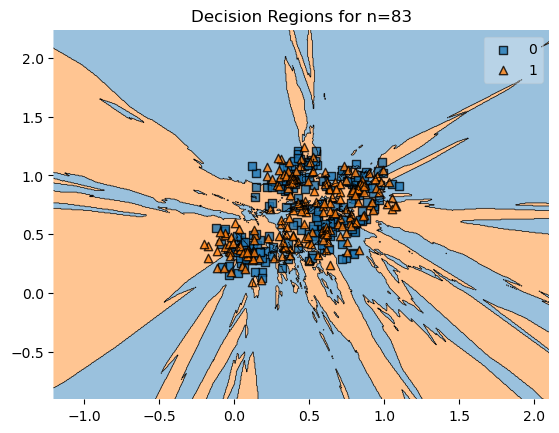

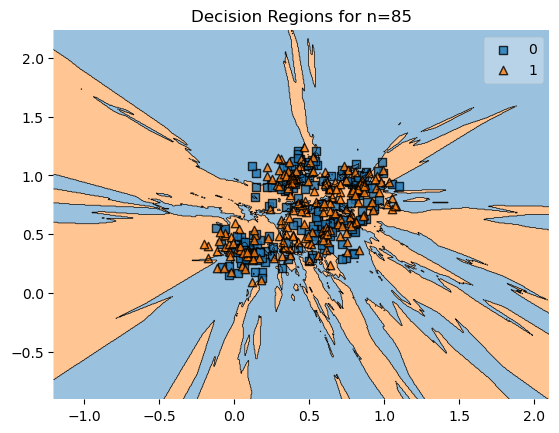

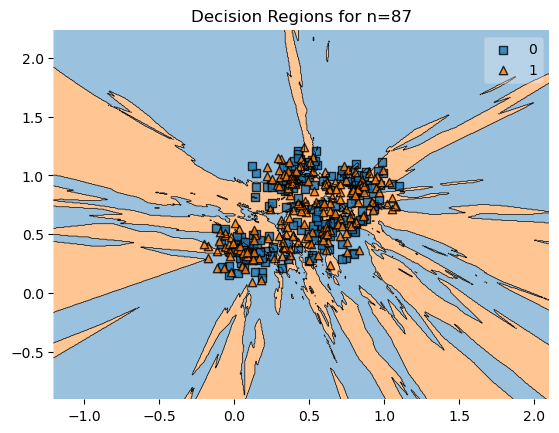

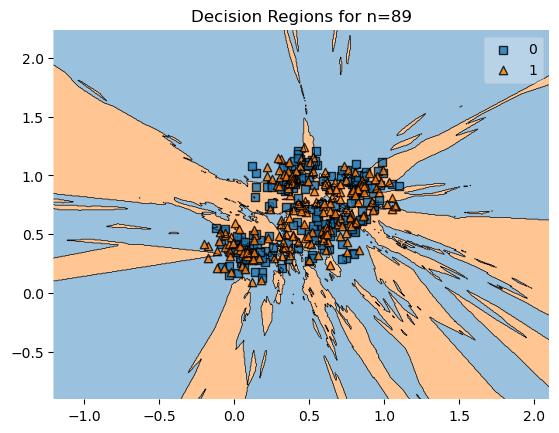

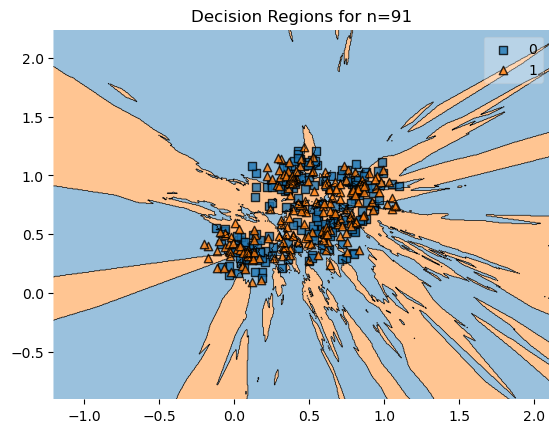

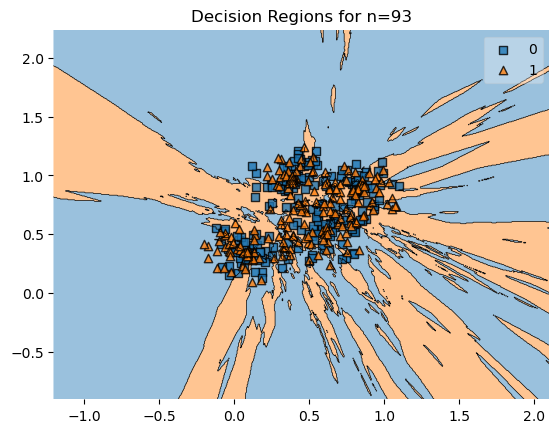

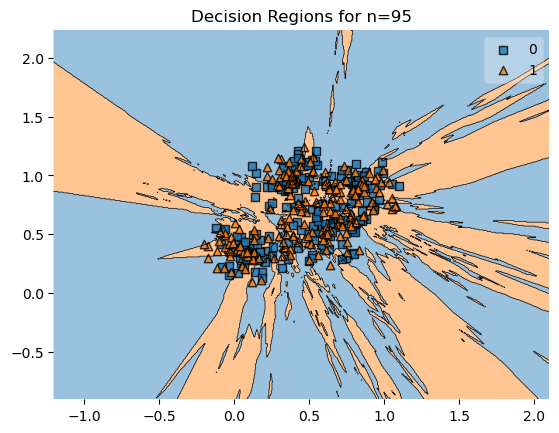

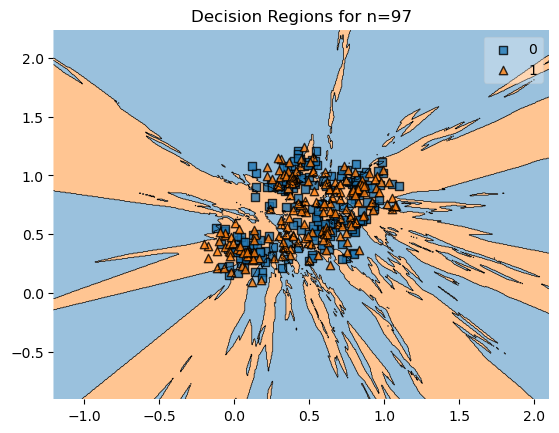

In [16]:
for n in range(1,99,2):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(fv,cv)
    plot_decision_regions(X=fv.values,y=cv.values,clf=knn)
    plt.title(f'Decision Regions for n={n}')
    plt.show()

In [2]:
df1=pd.read_csv(r"D:\Multiple CSV\Multiple CSV\9.random.csv",header=None)
fv=df1.iloc[:,:2]
cv=df1.iloc[: ,-1]
df1


0      1    2
0    0.374  1.080  0.0
1    0.445  1.140  1.0
2    0.514  1.130  0.0
3    0.466  1.240  1.0
4    0.371  0.968  1.0
..     ...    ...  ...
395  0.324  0.431  1.0
396  0.602  0.588  0.0
397  0.616  0.503  1.0
398  0.742  0.511  1.0
399  0.495  0.281  1.0

[400 rows x 3 columns]

In [3]:
X_train,X_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=42,stratify=cv)
knn=KNeighborsClassifier(n_neighbors=1)
model=knn.fit(X_train,y_train)
predicted=model.predict(X_test)

In [4]:
x_trinf,x_testf,cv_train,cv_test=train_test_split(X_train,y_train,test_size=0.1,random_state=42,stratify=y_train)

In [5]:

x_trinf = np.ascontiguousarray(x_trinf)
cv_train = np.ascontiguousarray(cv_train)
x_testf = np.ascontiguousarray(x_testf)

In [7]:
k=[]
acc=[]
err=[]
for n in range(1,288,2):
    knn=KNeighborsClassifier(n_neighbors=n)
    model=knn.fit(x_trinf,cv_train)
    predicted=model.predict(x_testf)

    k.append(n)
    acc.append(accuracy_score(cv_test,predicted))
    err.append(1-accuracy_score(cv_test,predicted))

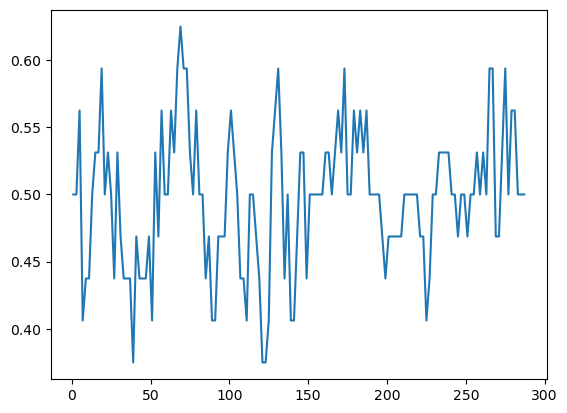

In [8]:
plt.plot(k,acc)
plt.show()

In [9]:
### select one from most accuray k value 

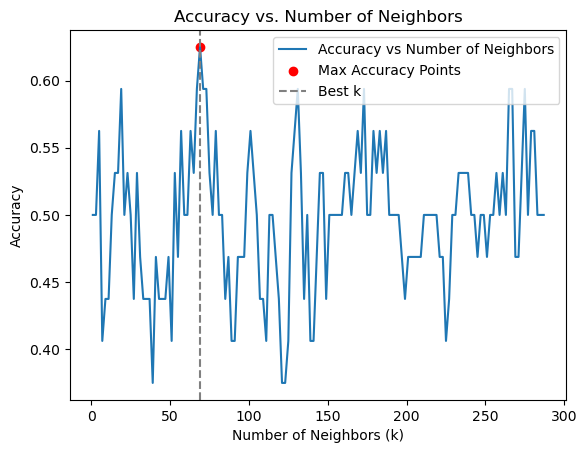

In [10]:
max_acc_indices = [i for i, j in enumerate(acc) if j == max(acc)]

# Plotting the graph
plt.plot(k, acc, label='Accuracy vs Number of Neighbors')
plt.scatter([k[i] for i in max_acc_indices], [acc[i] for i in max_acc_indices], color='red', marker='o', label='Max Accuracy Points')
plt.axvline(x=k[max_acc_indices[0]], color='gray', linestyle='--', label='Best k')  # Assuming the first max index for vertical line

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()